<a href="https://colab.research.google.com/github/khj0209/Floating-Population-Analyze/blob/master/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install cvlib

     |████████████████████████████████| 10.1MB 2.2MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.5-cp36-none-any.whl size=10044206 sha256=51245108e2e330012f77da49927ad529bb30c27ce0093677184bb9f5a465c34c
  Stored in directory: /root/.cache/pip/wheels/6a/cb/43/ba188c823836640d8f22ee1f6ff792a0c83a8b66eabf52b219
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12076 sha256=a194b5b255aa8920dbea413205e985afbe8b43729745b6c17ba28ff4d78929de
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


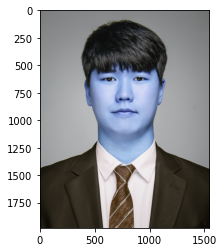

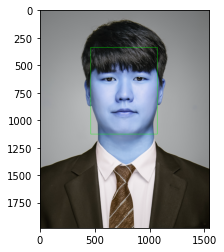

True

In [11]:
# import libraries
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
import numpy as np

image_path = '증명사진.jpg'
im = cv2.imread(image_path) # 이미지 읽기
plt.imshow(im)
plt.show()

# detect faces (얼굴 검출)
faces, confidences = cv.detect_face(im)

# loop through detected faces and add bounding box (검출된 얼굴을 박스로 감싸기)
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    # draw rectangle over face
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)

# display output        
plt.imshow(im)
plt.show()
cv2.imwrite('result.jpg', im) # 이미지 쓰기

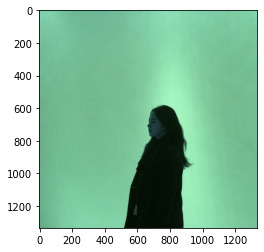

[0.31447697 0.68552303]
['male', 'female']


True

In [14]:
image_path = '윤정.jpg'
im = cv2.imread(image_path) # 이미지 읽기
plt.imshow(im)
plt.show()

# detect faces (얼굴 검출)
faces, confidences = cv.detect_face(im)

for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    # draw rectangle over face
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2) # 검출된 얼굴 위에 박스 그리기
    face_crop = np.copy(im[startY:endY, startX:endX])
    
    # gender detection (성별 검출)
    (label, confidence) = cv.detect_gender(face_crop)
    
    print(confidence)
    print(label)
    
    idx = np.argmax(confidence)
    label = label[idx]

    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(im, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2) # 박스 위에 남자인지 여자인지 라벨과 확률 쓰기
    

cv2.imwrite('result.jpg', im) # 이미지 쓰기